# APRIORI CHALLENGE

**File:** AprioriChallenge.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# CHALLENGE

In this challenge, I invite you to do the following:

1. Import and prepare the dataset `Epub.csv`.
1. Apply the apriori algorithm to the data.
1. List the rules in a readable table.
1. Plot the rules.

# INSTALL AND IMPORT LIBRARIES
The Python library `apyori` contains the implementation of the Apriori algorithm, which can be installed with Python's `pip` command. This command only needs to be done once per machine.

The standard, shorter approach may work:

In [ ]:
# pip install apyori

If the above command didn't work, it may be necessary to be more explicit, in which case you could run the code below.

In [ ]:
# import sys
# !{sys.executable} -m pip install apyori

Once `apyori` is installed, then load the libraries below.

In [3]:
import pandas as pd              # For dataframes
import matplotlib.pyplot as plt  # For plotting data
from apyori import apriori       # For Apriori algorithm

# LOAD AND PREPARE DATA

For this demonstration, we'll use the dataset `Epub.csv`, which comes from the R package `arules` and is saved as a CSV file. The data is in transactional format (as opposed to tabular format), which means that each row is a list of items purchased together and that the items may be in different order. There are 58 columns in each row, each column either contains a document ID or no data. (This dataset differs from the `Groceries` dataset in that it does not use `NaN` for blank cells, which makes the data file much smaller.)

The code below opens the dataset and converts to to list format, which is necessary for the `apriori()` function.

## Data Source

The Epub data set contains the download history of documents from the electronic publication platform of the Vienna University of Economics and Business Administration. The data was recorded between Jan 2003 and Dec 2008. The dataset was provided by Michael Hahsler from ePub-WU at http://epub.wu-wien.ac.at and is included in the R package `arules`.


In [1]:
transactions = []

with open('data/Epub.csv') as f:
    for line in f:
        transaction = [item for item in line.strip().split(',') if item != 'NaN']
        transactions.append(transaction)
    
transactions[:3]

[['"doc_154"'], ['"doc_3d6"'], ['"doc_16f"']]

In [4]:
rules = list(apriori(
    transactions, 
    min_support=0.001, 
    min_confidence=0.10,
    min_length=2,
    max_length=2))

# Prints one rule
print(rules[0])

RelationRecord(items=frozenset({'"doc_6bf"', '"doc_11d"'}), support=0.001589420815054994, ordered_statistics=[OrderedStatistic(items_base=frozenset({'"doc_6bf"'}), items_add=frozenset({'"doc_11d"'}), confidence=0.12195121951219513, lift=5.388120032885722)])


In [5]:
rules_df = pd.DataFrame(
    [{'From': list(rule[0])[0],
    'To': list(rule[0])[1],
    'Support': rule[1],
    'Confidence': rule[2][0][2],
    'Lift': rule[2][0][3]} for rule in rules if len(rule[0]) == 2])
rules_df = rules_df.dropna()

rules_df.head()

,From,To,Support,Confidence,Lift
0,"""doc_6bf""","""doc_11d""",0.001589,0.121951,5.388120
1,"""doc_4ac""","""doc_16e""",0.002797,0.346457,53.425660
2,"""doc_466""","""doc_19f""",0.001526,0.173913,25.806399
3,"""doc_1a2""","""doc_3ec""",0.001017,0.115942,13.311330
4,"""doc_1a2""","""doc_4c7""",0.002098,0.239130,17.996568


In [6]:
# Pick top rules
rules_df = rules_df.sort_values('Support', ascending=False).head(50)

# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
rules_df.head(20)

,From,To,Support,Confidence,Lift,FromN,ToN
53,"""doc_72f""","""doc_813""",0.004069,0.351648,16.811784,14,15
1,"""doc_4ac""","""doc_16e""",0.002797,0.346457,53.425660,19,25
14,"""doc_364""","""doc_71""",0.002734,0.233696,15.912549,43,44
46,"""doc_6bf""","""doc_60e""",0.002670,0.274510,21.062267,4,55
60,"""doc_972""","""doc_8f9""",0.002162,0.177083,18.693582,30,11
4,"""doc_1a2""","""doc_4c7""",0.002098,0.239130,17.996568,48,45
8,"""doc_359""","""doc_424""",0.001844,0.271028,44.406250,38,8
37,"""doc_84b""","""doc_4da""",0.001780,0.231405,34.016529,39,34
12,"""doc_364""","""doc_43d""",0.001780,0.152174,16.064050,43,33
58,"""doc_8af""","""doc_8a8""",0.001717,0.290323,47.077153,22,7


/tmp/ipykernel_49562/104011188.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


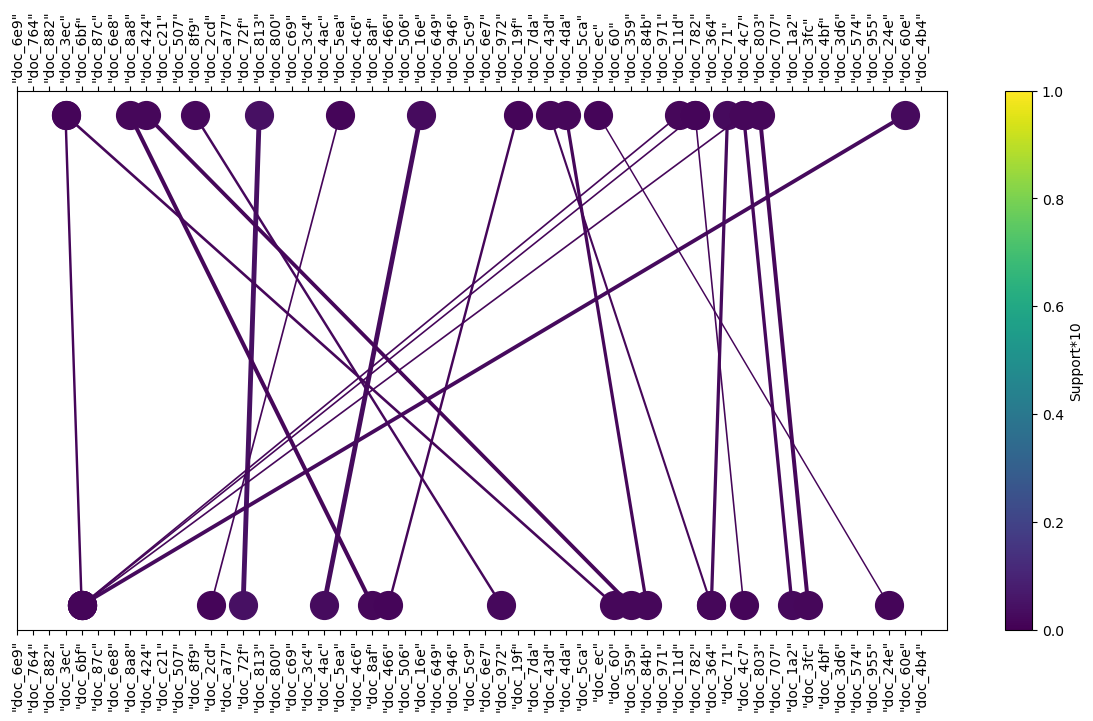

In [7]:
# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10),
             markersize=20,
             lw=row['Confidence'] * 10)

# Adds a colorbar and its title  
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.